In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./dataset.csv')

In [3]:
df_copy=df.copy()

In [4]:
df_copy.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [5]:
df_copy.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

#### Checking for Missing Values in every Column

In [6]:
df_copy.isna().sum()

species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

##### 'bill_length_mm','bill_depth_mm','flipper_length_mm' and 'body_mass_g' are numerical columns which are having null values

### Handling Null Values

In [7]:
df_copy[df_copy['bill_length_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
192,Gentoo,Biscoe,NaN,13.7,208.0,3950.0,female
193,Gentoo,Biscoe,NaN,16.0,225.0,5700.0,male
245,Gentoo,Biscoe,NaN,16.1,224.0,5650.0,male
249,Gentoo,Biscoe,NaN,14.6,222.0,4875.0,female
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
282,Chinstrap,Dream,NaN,18.2,178.0,3250.0,female


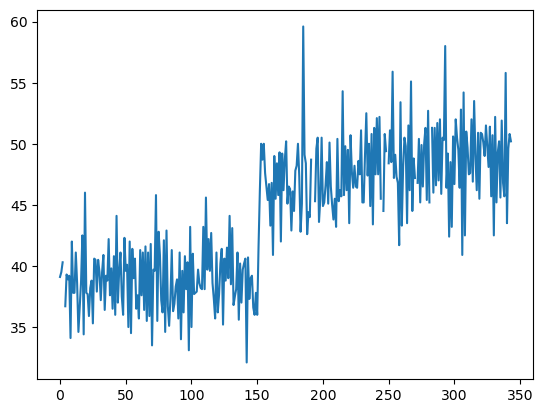

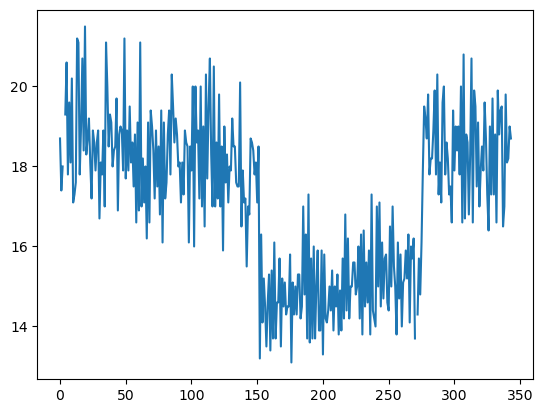

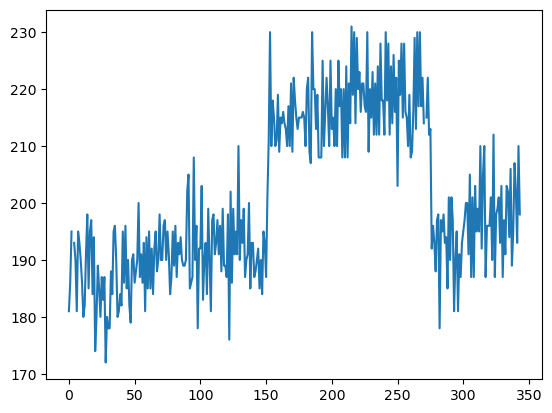

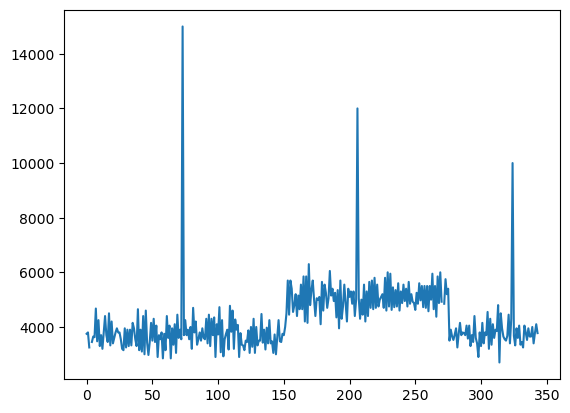

In [8]:
num_cols=['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']
for i in num_cols:
    df_copy[i].plot()
    plt.show()

### As the data is skewed we use 'MEDIAN' for filling null values

In [9]:
for i in num_cols:
    df_copy[i]=df_copy[i].fillna(df_copy[i].median())

In [10]:
df_copy.isna().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  16
dtype: int64

#### Filling Categorical Column Missing values

Using most occured data to replace the missing data 

In [11]:
df_copy['sex'].value_counts()

sex
male       164
female     162
unknown      2
Name: count, dtype: int64

In [12]:
df_copy['sex']=df['sex'].fillna(df_copy['sex'].mode()[0])

In [13]:
df_copy.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### To solve further Question, I am exporting this Preprocessed dataset

In [15]:
df_copy.to_csv('Preprocessed_df.csv',index=False)